# Sales Forecasting
In the ever-changing competitive market conditions, there is a need to make correct 
business decisions and plan for future events. The effectiveness of a business decision is 
influenced by the accuracy of the models used. Demand is the most important aspect of 
a business's ability to achieve its objectives. Many decisions in business depend on 
demand, like production, sales, and staff requirements. Forecasting is necessary for 
business at both international and domestic levels.

**Objective** Fresh Analytics, a data analytics company, aims to comprehend and predict the demand 
for various items across restaurants. To accurately forecast the sales of items across 
different restaurants over the years, enabling better decision-making and planning.


## Preliminary analysis
Import the datasets 

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load datasets
restaurants = pd.read_csv("Datasets\\Capstone 3\\resturants.csv")
items = pd.read_csv("Datasets\\Capstone 3\\items.csv")
sales = pd.read_csv("Datasets\\Capstone 3\\sales.csv")

In [8]:
# Inspect datasets
print("=== SHAPES ===")
print("Items:", items.shape)
print("Restaurants:", restaurants.shape)
print("Sales:", sales.shape)

print("\n=== INFO ===")
print("Items:",items.info())
print("Restaurants:",restaurants.info())
print("Sales:",sales.info())

print("\n=== HEADS ===")
print("Items:",items.head())
print("Restaurants:",restaurants.head())
print("Sales:",sales.head())

print("\n=== STATISTICS ===")
print("Items:",items.describe())
print("Sales:",sales.describe())

=== SHAPES ===
Items: (100, 5)
Restaurants: (6, 2)
Sales: (109600, 4)

=== INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        100 non-null    int64  
 1   store_id  100 non-null    int64  
 2   name      100 non-null    object 
 3   kcal      100 non-null    int64  
 4   cost      100 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 4.0+ KB
Items: None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      6 non-null      int64 
 1   name    6 non-null      object
dtypes: int64(1), object(1)
memory usage: 224.0+ bytes
Restaurants: None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109600 entries, 0 to 109599
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype

**Detect outliers**


=== OUTLIERS ===
kcal : Outliers: 1
cost : Outliers: 1

=== OUTLIERS ===
price : Outliers: 1096
item_count : Outliers: 23484


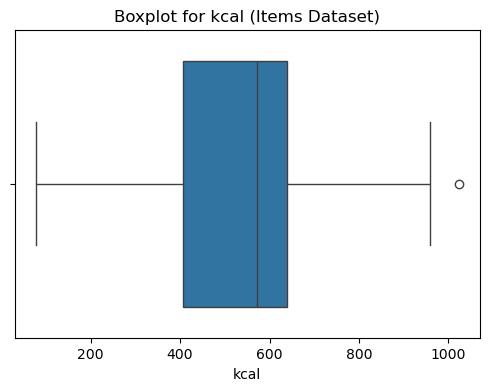

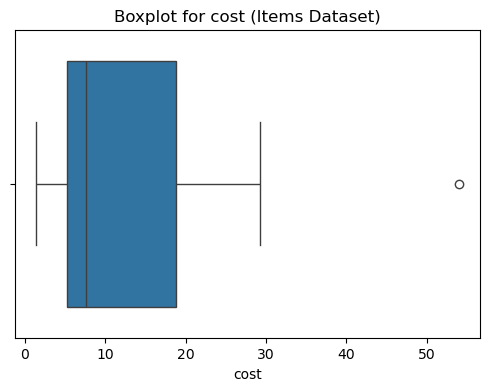

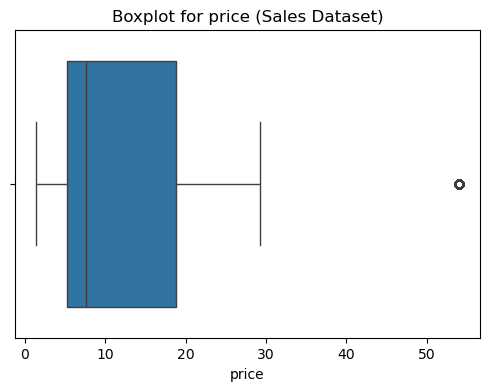

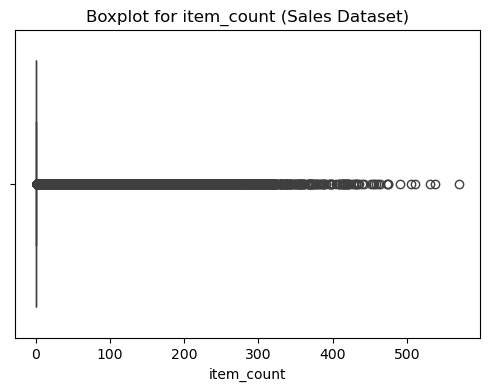

In [11]:
# Detect outliers
def detect_outliers(df, cols):
    print("\n=== OUTLIERS ===")
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        count = df[(df[col] < lower) | (df[col] > upper)].shape[0]
        print(f"{col} : Outliers: {count}")

# Numeric columns for outlier check
numeric_cols_items = ['kcal', 'cost']
numeric_cols_sales = ['price', 'item_count']

detect_outliers(items, numeric_cols_items)
detect_outliers(sales, numeric_cols_sales)

# Boxplot for items dataset
for col in numeric_cols_items:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=items[col])
    plt.title(f"Boxplot for {col} (Items Dataset)")
    plt.show()

# Boxplot for sales dataset
for col in numeric_cols_sales:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=sales[col])
    plt.title(f"Boxplot for {col} (Sales Dataset)")
    plt.show()

#### Merge dataset
To perform meaningful analysis and build predictive models, these datasets must be combined into a single, unified structure.
- restaurants.csv – contains information about restaurants (store ID and store name)

- items.csv – contains item-level details such as item name, calorie count, and price

- sales.csv – contains transactional sales records including date, item sold, quantity, and price

**Keys used for merging**
The datasets share common identifiers that act as keys:
- *item_id*: Used to merge sales.csv with items.csv
- *store_id*: Used to merge the combined dataset with restaurants.csv. These identifiers ensure that the correct records are matched across datasets.

A left join strategy was used during merging. This ensures that All sales records are retained, item and restaurant details are appended wherever a match exists, and no sales information is lost due to missing reference data

In [14]:
# Merge sales with items
merged_df = sales.merge(
    items,
    left_on="item_id",
    right_on="id",
    how="left"
)

# Merge with restaurants
merged_df = merged_df.merge(
    restaurants,
    left_on="store_id",
    right_on="id",
    how="left",
    suffixes=("_item", "_store")
)

# Drop duplicate IDs created during merge
merged_df.drop(columns=["id_item", "id_store"], inplace=True)

print("\n=== MERGED DATASET ===")
print(merged_df.head())

print("\nMerged dataset shape:", merged_df.shape)


=== MERGED DATASET ===
         date  item_id  price  item_count  store_id  \
0  2019-01-01        3  29.22         2.0         1   
1  2019-01-01        4  26.42        22.0         1   
2  2019-01-01       12   4.87         7.0         1   
3  2019-01-01       13   4.18        12.0         1   
4  2019-01-01       16   3.21       136.0         1   

                         name_item  kcal   cost   name_store  
0                Sweet Fruity Cake   931  29.22  Bob's Diner  
1  Amazing Steak Dinner with Rolls   763  26.42  Bob's Diner  
2             Fantastic Sweet Cola   478   4.87  Bob's Diner  
3          Sweet Frozen Soft Drink   490   4.18  Bob's Diner  
4             Frozen Milky Smoothy   284   3.21  Bob's Diner  

Merged dataset shape: (109600, 9)


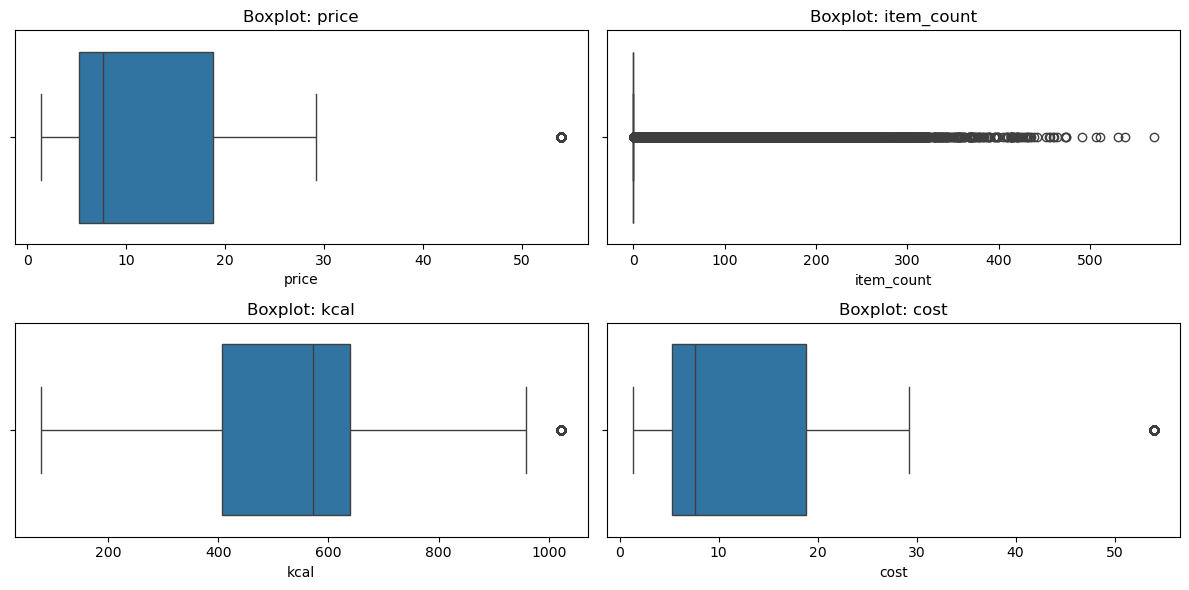

In [16]:
# Plot outliers
numeric_cols = ['price', 'item_count', 'kcal', 'cost']

plt.figure(figsize=(12,6))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=merged_df[col])
    plt.title(f"Boxplot: {col}")

plt.tight_layout()
plt.show()

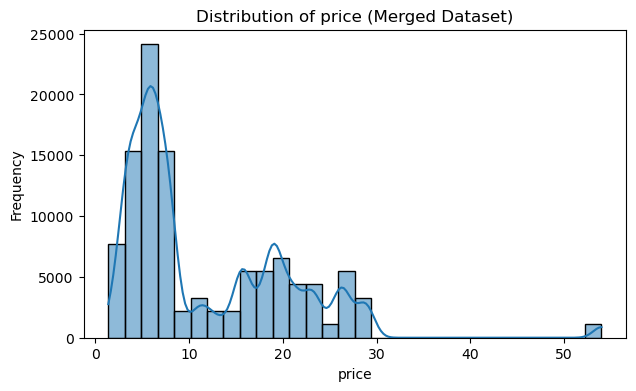

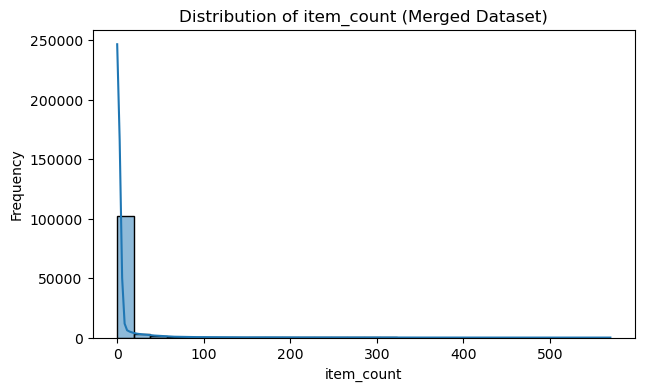

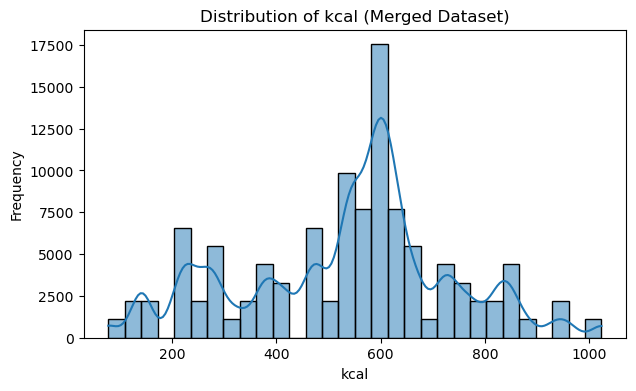

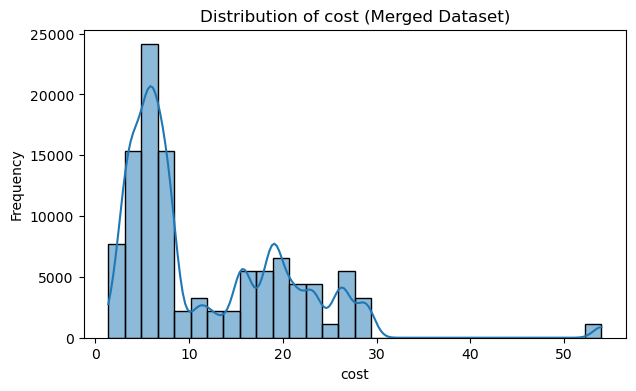

In [18]:
# Plot distributions
merged_numeric = ['price', 'item_count', 'kcal', 'cost']

for col in merged_numeric:
    plt.figure(figsize=(7,4))
    sns.histplot(merged_df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col} (Merged Dataset)")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

## Exploratory Data Analysis

CLEAN DATE & ADD TIME FEATURES

In [20]:
# Convert date column to datetime
merged_df['date'] = pd.to_datetime(merged_df['date'])

# Add time features
merged_df['year'] = merged_df['date'].dt.year
merged_df['month'] = merged_df['date'].dt.month
merged_df['month_name'] = merged_df['date'].dt.month_name()
merged_df['weekday'] = merged_df['date'].dt.day_name()
merged_df['quarter'] = merged_df['date'].dt.quarter

# Compute monetary sales
merged_df['sales_amount'] = merged_df['price'] * merged_df['item_count']
merged_df.head()

,date,item_id,price,item_count,store_id,name_item,kcal,cost,name_store,year,month,month_name,weekday,quarter,sales_amount
0,2019-01-01,3,29.22,2.0,1,Sweet Fruity Cake,931,29.22,Bob's Diner,2019,1,January,Tuesday,1,58.44
1,2019-01-01,4,26.42,22.0,1,Amazing Steak Dinner with Rolls,763,26.42,Bob's Diner,2019,1,January,Tuesday,1,581.24
2,2019-01-01,12,4.87,7.0,1,Fantastic Sweet Cola,478,4.87,Bob's Diner,2019,1,January,Tuesday,1,34.09
3,2019-01-01,13,4.18,12.0,1,Sweet Frozen Soft Drink,490,4.18,Bob's Diner,2019,1,January,Tuesday,1,50.16
4,2019-01-01,16,3.21,136.0,1,Frozen Milky Smoothy,284,3.21,Bob's Diner,2019,1,January,Tuesday,1,436.56


**Overall sales pattern**

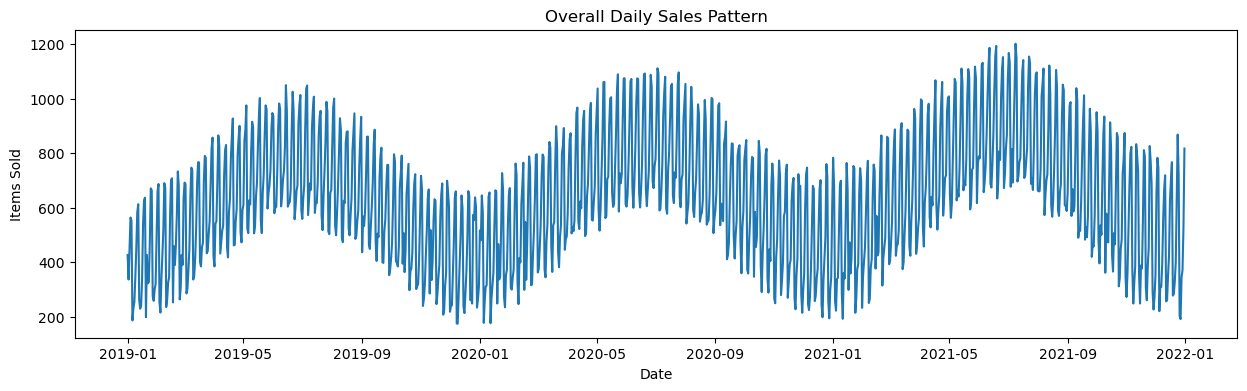

In [89]:
daily_sales = merged_df.groupby('date')['item_count'].sum()

plt.figure(figsize=(15,4))
plt.plot(daily_sales)
plt.title("Overall Daily Sales Pattern")
plt.xlabel("Date")
plt.ylabel("Items Sold")
plt.show()

**Sales across days of the week**

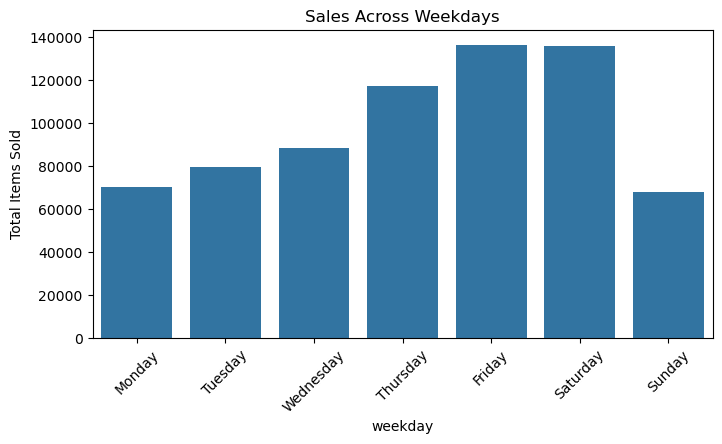

In [24]:
weekday_sales = merged_df.groupby('weekday')['item_count'].sum()
weekday_sales = weekday_sales.reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

plt.figure(figsize=(8,4))
sns.barplot(x=weekday_sales.index, y=weekday_sales.values)
plt.title("Sales Across Weekdays")
plt.ylabel("Total Items Sold")
plt.xticks(rotation=45)
plt.show()

**Monthly trends**

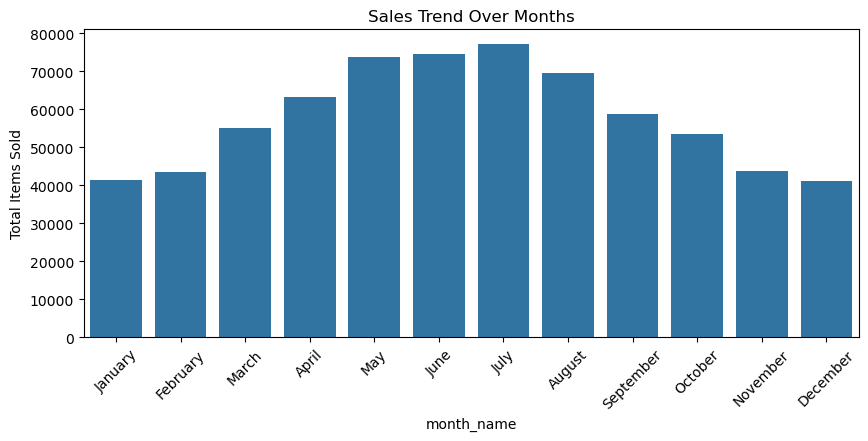

In [97]:
monthly_sales = merged_df.groupby('month_name')['item_count'].sum()
monthly_sales = monthly_sales.reindex([
    'January','February','March','April','May','June',
    'July','August','September','October','November','December'
])

plt.figure(figsize=(10,4))
sns.barplot(x=monthly_sales.index, y=monthly_sales.values)
plt.title("Sales Trend Over Months")
plt.ylabel("Total Items Sold")
plt.xticks(rotation=45)
plt.show()

**Quarterly sales**

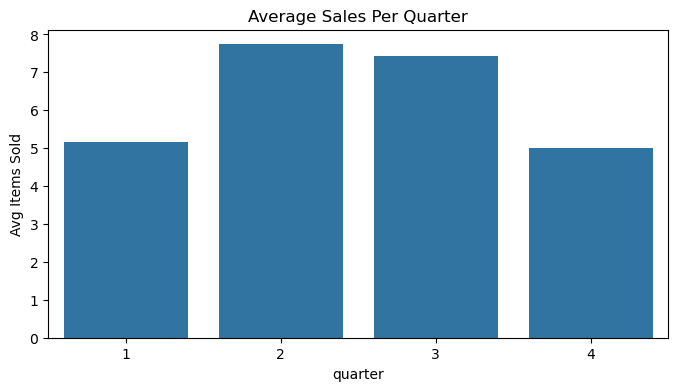

In [28]:
quarterly_sales = merged_df.groupby('quarter')['item_count'].mean()

plt.figure(figsize=(8,4))
sns.barplot(x=quarterly_sales.index, y=quarterly_sales.values)
plt.title("Average Sales Per Quarter")
plt.ylabel("Avg Items Sold")
plt.show()

**Restaurant performance**

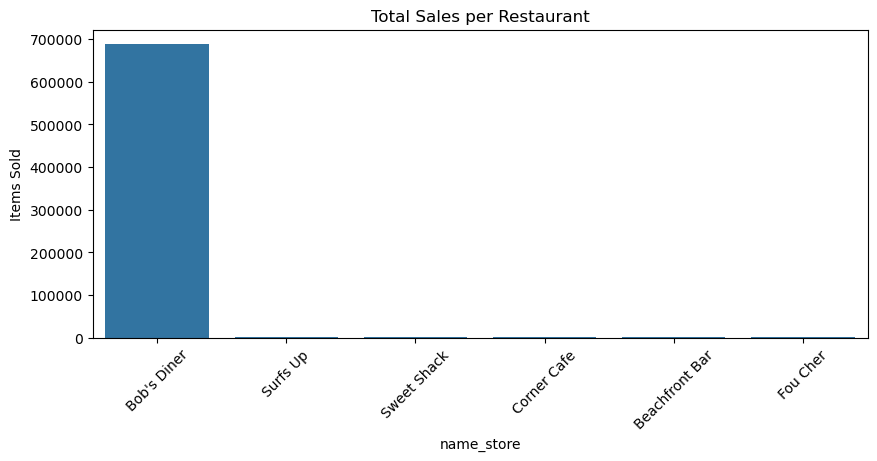

In [33]:
# Total sales per restaurant
store_sales = merged_df.groupby('name_store')['item_count'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,4))
sns.barplot(x=store_sales.index, y=store_sales.values)
plt.title("Total Sales per Restaurant")
plt.ylabel("Items Sold")
plt.xticks(rotation=45)
plt.show()

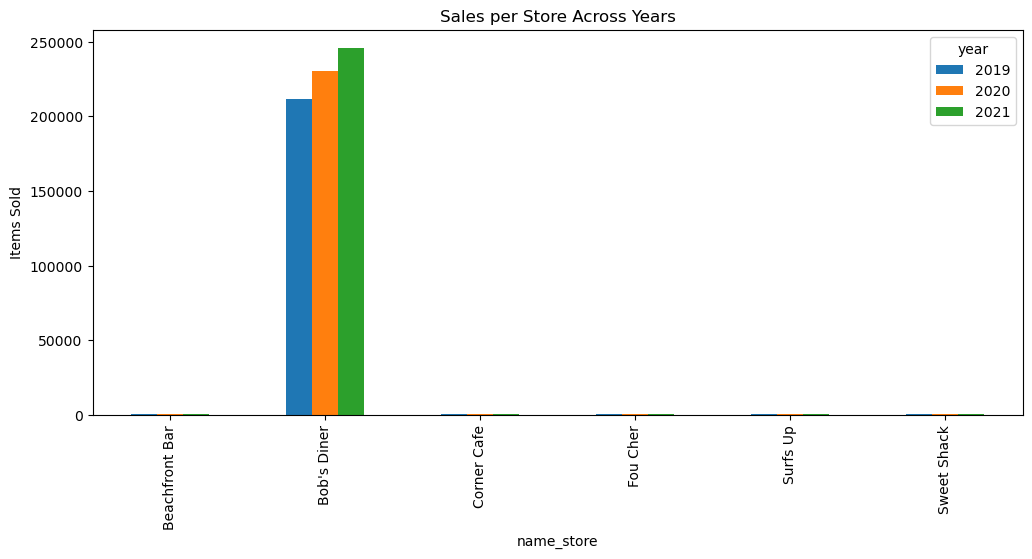

In [35]:
# Sales per store per year
yearly_store_sales = merged_df.groupby(['name_store','year'])['item_count'].sum().unstack()

yearly_store_sales.plot(kind='bar', figsize=(12,5))
plt.title("Sales per Store Across Years")
plt.ylabel("Items Sold")
plt.show()


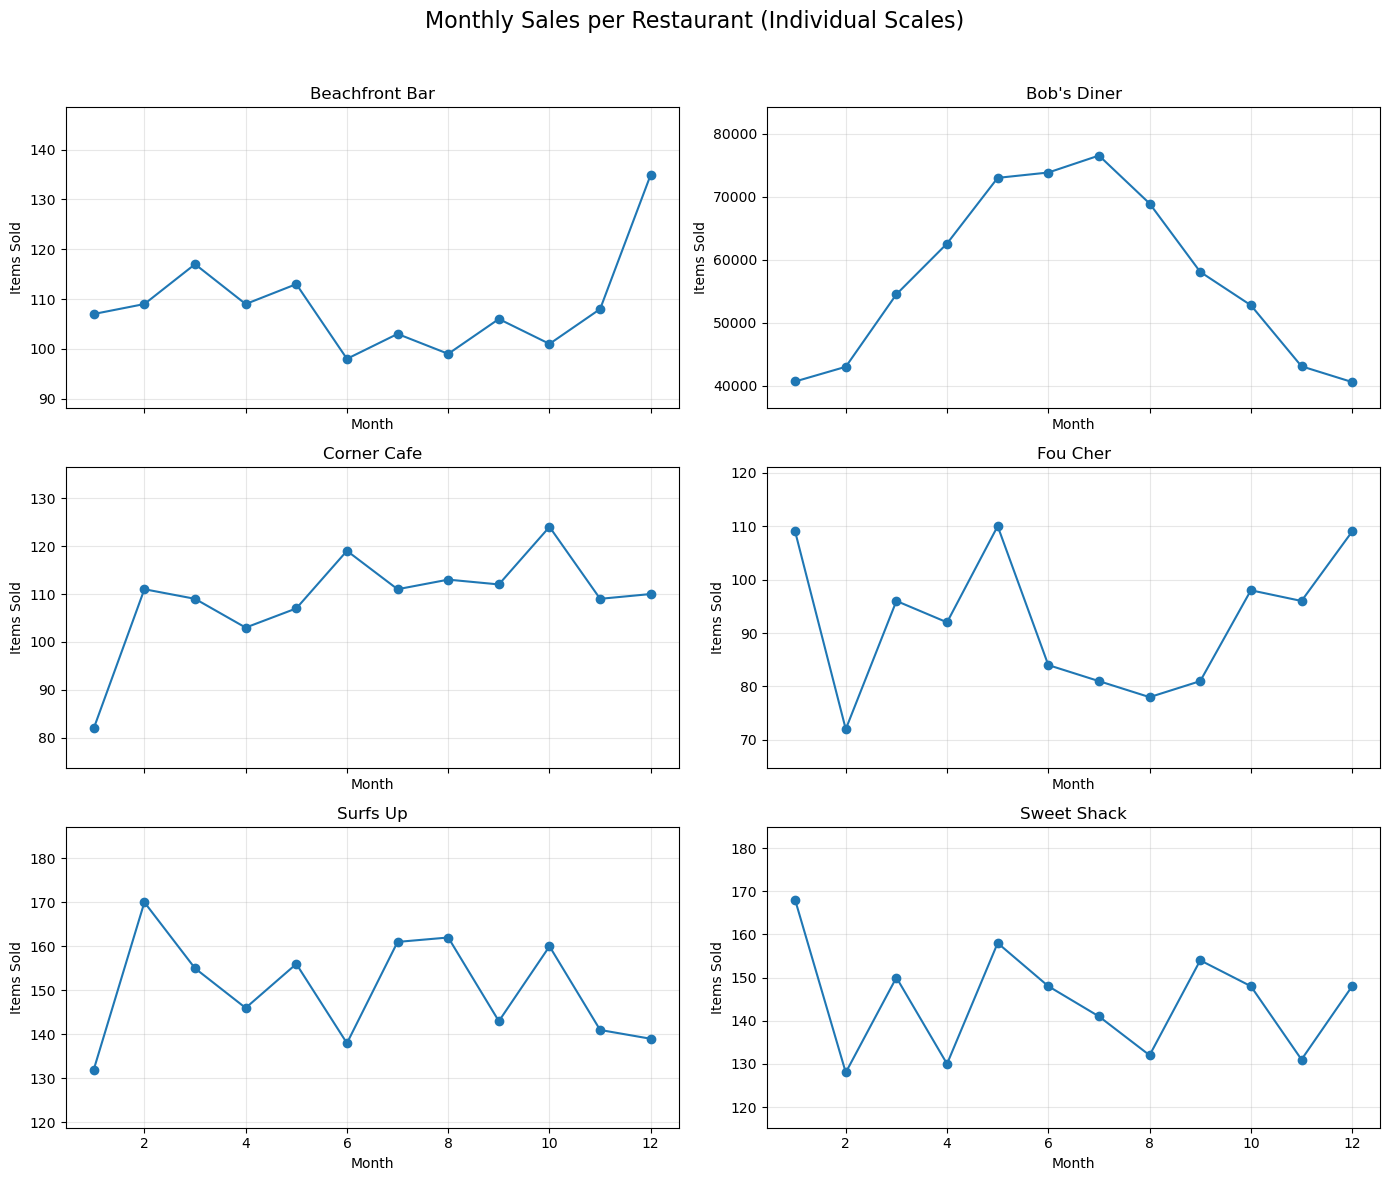

In [39]:
# Sales per store per month
monthly_store_sales = merged_df.groupby(['name_store','month'])['item_count'].sum().unstack()

# Ensure months are ordered 1–12
monthly_store_sales = monthly_store_sales.reindex(columns=range(1, 13))

stores = monthly_store_sales.index
n_stores = len(stores)

# Create subplots (NO shared y-axis)
rows = (n_stores + 1) // 2
fig, axes = plt.subplots(rows, 2, figsize=(14, 4 * rows), sharex=True)
axes = axes.flatten()

for i, store in enumerate(stores):
    axes[i].plot(
        monthly_store_sales.columns,
        monthly_store_sales.loc[store],
        marker='o'
    )
    
    axes[i].set_title(store)
    axes[i].set_xlabel("Month")
    axes[i].set_ylabel("Items Sold")
    
    # Fit y-scale individually
    y_min = monthly_store_sales.loc[store].min()
    y_max = monthly_store_sales.loc[store].max()
    axes[i].set_ylim(y_min * 0.9, y_max * 1.1)
    
    axes[i].grid(alpha=0.3)

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Monthly Sales per Restaurant (Individual Scales)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

**Most popular items overall and per store**

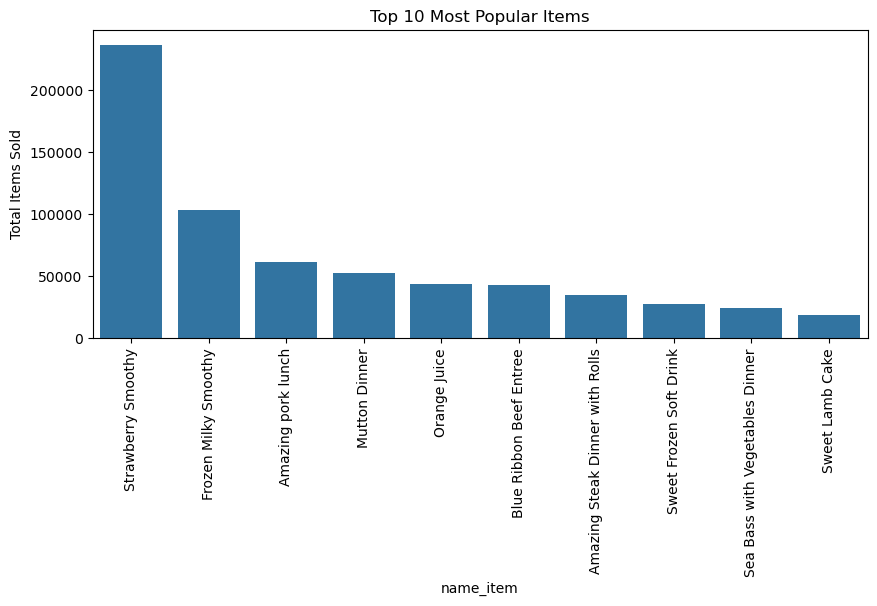

In [110]:
# Most popular items overall
item_popularity = merged_df.groupby('name_item')['item_count'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,4))
sns.barplot(x=item_popularity.index, y=item_popularity.values)
plt.title("Top 10 Most Popular Items")
plt.ylabel("Total Items Sold")
plt.xticks(rotation=90)
plt.show()


In [42]:
# Most popular item per store
store_top_items = merged_df.groupby(['name_store','name_item'])['item_count'].sum()

store_top_items = store_top_items.reset_index().sort_values(
    ['name_store','item_count'], ascending=[True,False]
)

most_popular_per_store = store_top_items.groupby('name_store').first()
print("Most popular item per store:")
print(most_popular_per_store)


Most popular item per store:
                                    name_item  item_count
name_store                                               
Beachfront Bar        Fantastic Milky Smoothy      1147.0
Bob's Diner                Strawberry Smoothy    236337.0
Corner Cafe              Frozen Milky Smoothy       273.0
Fou Cher        Blue Ribbon Fruity Vegi Lunch       298.0
Surfs Up                   Awesome Soft Drink       997.0
Sweet Shack                   Awesome Smoothy      1692.0


Each restaurant has a distinct best-selling item, indicating that customer preferences vary significantly by location and brand positioning.

This suggests:
- Menu items perform differently depending on the restaurant type
- A one-size-fits-all menu strategy is not optimal

Bob’s Diner stands out dramatically with 236,337 units sold of Strawberry Smoothy, which is orders of magnitude higher than other stores.

This indicates:
- Very high footfall at Bob’s Diner
- Strong brand association with smoothies
- Strawberry Smoothy should be treated as a core product at Bob’s Diner, with inventory prioritization, combo offers, and promotional bundling.

Most stores’ top items fall under beverages or light refreshment categories. This indicates high demand for quick-serve, refreshment-type items. Focus marketing and upselling strategies around beverages, especially during peak hours.

Stores like Corner Cafe and Fou Cher show much lower volumes (≈300 units), which may indicate Smaller customer base, limited operating hours, more specialized or premium offerings.

These insights can be leveraged to optimize inventory, promotions, and menu strategies at both high-performing and underperforming restaurants.

In [114]:
# Does the store with the highest volume make the most money?
store_volume = merged_df.groupby('name_store')['item_count'].sum().sort_values(ascending=False)
store_revenue = merged_df.groupby('name_store')['sales_amount'].sum().sort_values(ascending=False)

comparison_df = pd.DataFrame({
    "Total Volume Sold": store_volume,
    "Total Revenue": store_revenue
})

print(comparison_df)


                Total Volume Sold  Total Revenue
name_store                                      
Beachfront Bar             1305.0        3796.20
Bob's Diner              687527.0     6337275.69
Corner Cafe                1310.0       16551.43
Fou Cher                   1106.0       27885.37
Surfs Up                   1803.0       15651.49
Sweet Shack                1736.0        2578.27


The analysis highlights Bob’s Diner as the dominant contributor to both sales volume and revenue, driven by exceptionally high customer demand. While most restaurants operate in a moderate volume–revenue range, Fou Cher distinguishes itself through high revenue efficiency despite lower sales volume, indicating a premium pricing strategy. Conversely, Sweet Shack exhibits weak revenue performance relative to its sales volume, suggesting potential pricing or product mix inefficiencies. These insights emphasize that while volume drives revenue at scale, pricing strategy plays a critical role in profitability at smaller outlets.

In [47]:
# Most expensive item at each restaurant + calorie count
expensive_items = merged_df.groupby('name_store').apply(
    lambda x: x.loc[x['cost'].idxmax()][['name_item','cost','kcal']]
)

print("Most expensive items per restaurant:")
print(expensive_items)


Most expensive items per restaurant:
                                    name_item   cost  kcal
name_store                                                
Beachfront Bar          Sweet Vegi Soft Drink   5.70   538
Bob's Diner                 Sweet Fruity Cake  29.22   931
Corner Cafe                        Pike Lunch  26.37   653
Fou Cher        Blue Ribbon Fruity Vegi Lunch  53.98   881
Surfs Up                           Steak Meal  26.21   607
Sweet Shack     Blue Ribbon Frozen Milky Cake   7.70   636


C:\Users\lenovo\AppData\Local\Temp\ipykernel_5668\893034854.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  expensive_items = merged_df.groupby('name_store').apply(


C:\Users\lenovo\AppData\Local\Temp\ipykernel_5668\1192177622.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='name_store', y='kcal', data=most_expensive_item, palette='coolwarm')


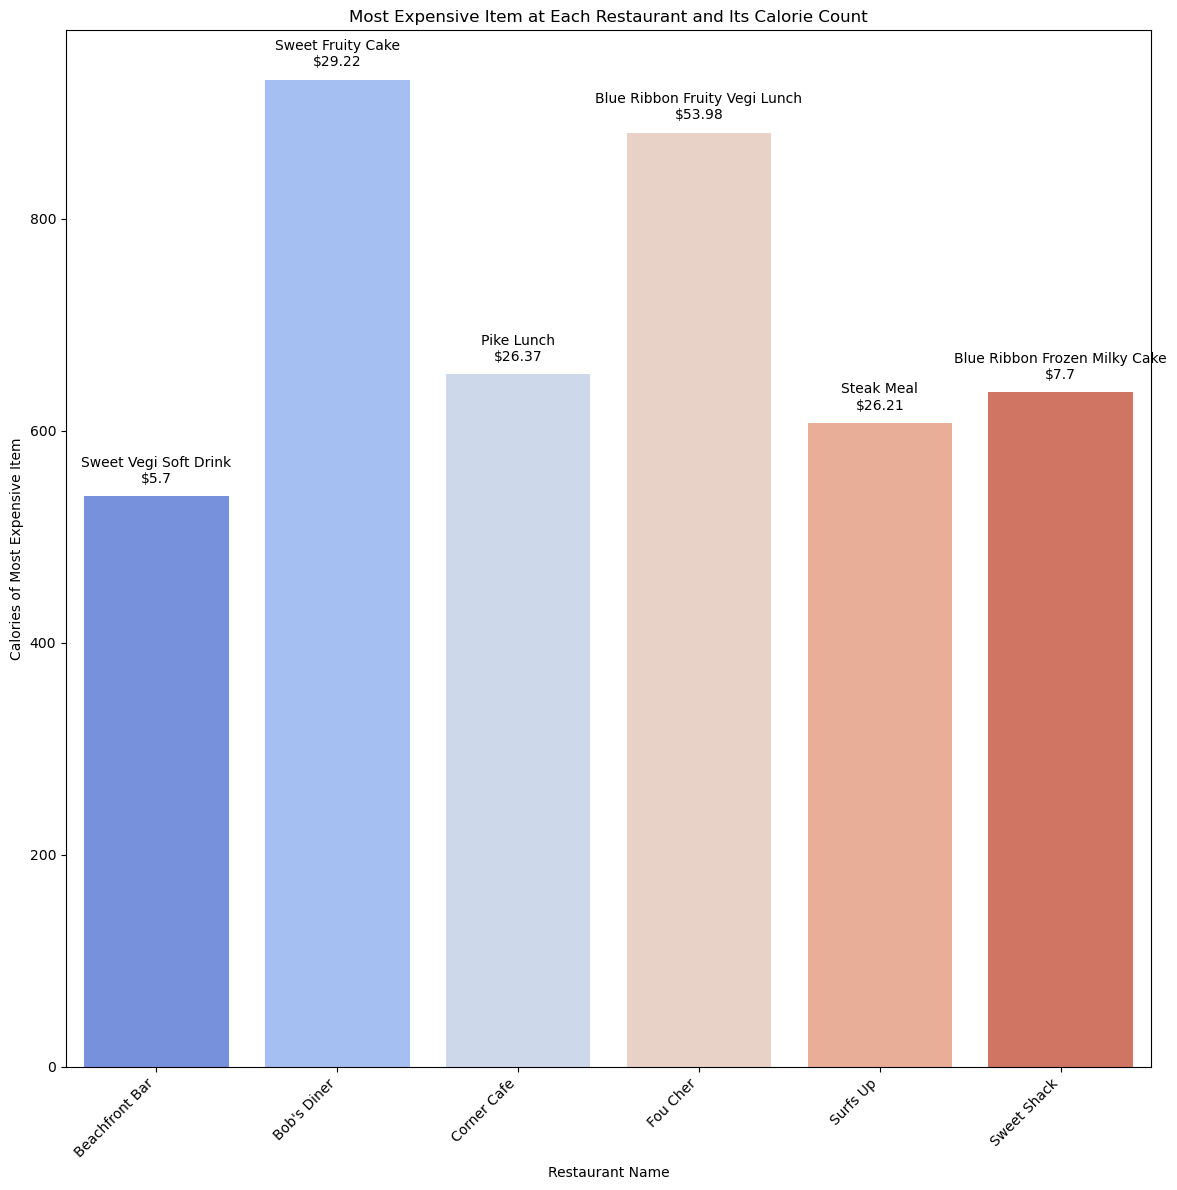

In [138]:
# Group by store name and get the most expensive item for each restaurant
most_expensive_item = merged_df.loc[merged_df.groupby('name_store')['cost'].idxmax()][['name_store', 'name_item', 'kcal', 'cost']]

# Visualizing the most expensive items and their calorie count
plt.figure(figsize=(12, 12))
ax = sns.barplot(x='name_store', y='kcal', data=most_expensive_item, palette='coolwarm')

# Add item name and price as annotations on top of each bar
for i in range(len(most_expensive_item)):
    item_name = most_expensive_item['name_item'].iloc[i]
    price = most_expensive_item['cost'].iloc[i]
    ax.text(i, most_expensive_item['kcal'].iloc[i] + 10, f'{item_name}\n${price}',
            ha='center', va='bottom', fontsize=10, color='black')

plt.title('Most Expensive Item at Each Restaurant and Its Calorie Count')
plt.xlabel('Restaurant Name')
plt.ylabel('Calories of Most Expensive Item')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

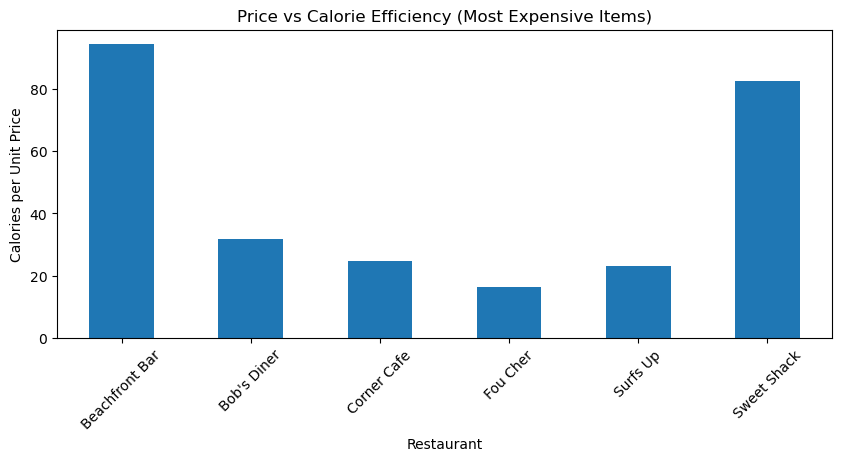

In [50]:
expensive_items['calorie_efficiency'] = expensive_items['kcal'] / expensive_items['cost']
expensive_items.sort_values('calorie_efficiency', ascending=False)

expensive_items['calorie_efficiency'].plot(
    kind='bar',
    figsize=(10,4)
)

plt.title("Price vs Calorie Efficiency (Most Expensive Items)")
plt.ylabel("Calories per Unit Price")
plt.xlabel("Restaurant")
plt.xticks(rotation=45)
plt.show()

In [54]:
items_df = merged_df[['name_item', 'name_store', 'cost', 'kcal']].drop_duplicates()

items_df['calorie_efficiency'] = items_df['kcal'] / items_df['cost']

q1 = items_df['calorie_efficiency'].quantile(0.25)
q3 = items_df['calorie_efficiency'].quantile(0.75)

print("Q1 (Low Efficiency Threshold):", q1)
print("Q3 (High Efficiency Threshold):", q3)

def pricing_label(x):
    if x < q1:
        return "Overpriced"
    elif x > q3:
        return "Underpriced"
    else:
        return "Fairly Priced"

items_df['pricing_category'] = items_df['calorie_efficiency'].apply(pricing_label)

overpriced_items = items_df[items_df['pricing_category'] == 'Overpriced'] \
                    .sort_values('calorie_efficiency')

print("Overpriced items\n",overpriced_items.head(10))

underpriced_items = items_df[items_df['pricing_category'] == 'Underpriced'] \
                     .sort_values('calorie_efficiency', ascending=False)

print("Underpriced items\n",underpriced_items.head(10))

Q1 (Low Efficiency Threshold): 34.31394408376505
Q3 (High Efficiency Threshold): 93.37297163384119
Overpriced items
                                      name_item   name_store   cost  kcal  \
11         Awesome Fish with Vegetables Entree  Bob's Diner  23.43   227   
26        Amazing Trout with Vegetables Dinner     Surfs Up  24.98   258   
46       Fantastic Fish with Vegetables Entree  Corner Cafe  21.14   232   
6            Amazing Fish with Vegetables Meal  Bob's Diner  23.23   269   
90                         Oysters Rockefeller     Surfs Up  16.06   204   
82               Blue Ribbon Fruity Vegi Lunch     Fou Cher  53.98   881   
13                     Blue Ribbon Beef Entree  Bob's Diner  23.37   392   
70                         Roast Mutton Entree     Surfs Up  16.09   293   
49  Awesome Fruity Lamb with Vegetables Dinner  Corner Cafe  19.03   361   
31          Original Lamb with Vegetables Meal  Corner Cafe  18.78   380   

    calorie_efficiency pricing_category  
11  

The analysis of the most expensive items across restaurants reveals clear differentiation in pricing strategies. Fou Cher adopts a premium positioning with significantly higher-priced items, while Beachfront Bar and Sweet Shack focus on affordability. Bob’s Diner balances moderate premium pricing with high-calorie offerings, appealing to a mass-market audience. These insights highlight how pricing reflects brand positioning rather than calorie content alone and suggest opportunities for targeted menu optimization across different restaurant segments.

The calorie efficiency analysis reveals a clear bifurcation in menu pricing strategy. Protein-rich items exhibit low calorie efficiency and are positioned as premium offerings, where pricing reflects quality and experience rather than portion size. In contrast, beverages and desserts demonstrate exceptionally high calorie efficiency, indicating underpricing and strong value propositions. These items likely drive customer volume and repeat purchases. Together, these findings suggest an intentional dual strategy combining premium revenue drivers with high-value, high-volume items, offering opportunities for targeted repricing and bundling to optimize overall profitability.

### Test hypothesis
Hypothesis testing is essential in data analysis as it provides a structured approach to validating assumptions and identifying statistically significant patterns in data. It enables analysts to distinguish between meaningful trends and random variations, thereby supporting reliable and objective decision-making. In a business context, hypothesis testing reduces uncertainty, guides strategic actions, and ensures that conclusions drawn from data are both scientifically sound and practically relevant.

**H1.** Sales are significantly different across weekdays
Hypothesis:

Null (H0): Mean sales are the same for all weekdays

Alternative (H1): At least one weekday has significantly different sales

Test Used: One-way ANOVA (for >2 group mean comparison)

In [60]:
from scipy.stats import f_oneway

weekday_groups = [
    merged_df[merged_df['weekday']=='Monday']['item_count'],
    merged_df[merged_df['weekday']=='Tuesday']['item_count'],
    merged_df[merged_df['weekday']=='Wednesday']['item_count'],
    merged_df[merged_df['weekday']=='Thursday']['item_count'],
    merged_df[merged_df['weekday']=='Friday']['item_count'],
    merged_df[merged_df['weekday']=='Saturday']['item_count'],
    merged_df[merged_df['weekday']=='Sunday']['item_count'],
]

f_stat, p_value = f_oneway(*weekday_groups)
print("ANOVA - Weekday Sales")
print("F-Statistic:", f_stat)
print("p-value:", p_value)

if p_value <0.05:
    print(""">> Reject H0
                - There is a statistically significant difference in average sales across weekdays.
                - Customer demand is not uniform across the week.
                - Certain days have systematically higher sales
                - You must consider day-of-week seasonality in forecasting models
                - Restaurants can plan staff, inventory, and pricing more efficiently
                - Promotions can be scheduled on low-performing days""")
else:
    print(">> fail to reject H0 → No difference in weekday sales.")

ANOVA - Weekday Sales
F-Statistic: 63.13998210379206
p-value: 1.3591069972532612e-78
>> Reject H0
                - There is a statistically significant difference in average sales across weekdays.
                - Customer demand is not uniform across the week.
                - Certain days have systematically higher sales
                - You must consider day-of-week seasonality in forecasting models
                - Restaurants can plan staff, inventory, and pricing more efficiently
                - Promotions can be scheduled on low-performing days


**H2.** Weekend sales are higher than weekday sales.

Null (H0): Weekend sales ≤ Weekday sales

Alternative (H1): Weekend sales > Weekday sales

Test Used: One-sided independent t-test

In [63]:
from scipy.stats import ttest_ind

weekend = merged_df[merged_df['weekday'].isin(['Saturday','Sunday'])]['item_count']
weekday = merged_df[merged_df['weekday'].isin(['Monday','Tuesday','Wednesday','Thursday','Friday'])]['item_count']

t_stat, p_value = ttest_ind(weekend, weekday, equal_var=False)

print("T-test: Weekend > Weekday Sales")
print("T-Statistic:", t_stat)
print("p-value:", p_value/2)   # one-sided test

if p_value <0.05:
    print(">> Reject Null hypothesis")
else:
   print(""" >> Fail to reject Null hypothesis
                There is no statistically significant evidence that weekend sales are higher than weekday sales.
                Although weekend sales might appear slightly higher, the difference is not large enough to be statistically meaningful.""") 

T-test: Weekend > Weekday Sales
T-Statistic: 1.278664625667795
p-value: 0.10051032561341777
 >> Fail to reject Null hypothesis
                There is no statistically significant evidence that weekend sales are higher than weekday sales.
                Although weekend sales might appear slightly higher, the difference is not large enough to be statistically meaningful.


In [65]:
print("Weekend Mean:", weekend.mean())
print("Weekday Mean:", weekday.mean())

Weekend Mean: 6.528076923076923
Weekday Mean: 6.264170918367347


**H3.** Restaurant with the highest sales volume also earns the highest revenue

Null (H0): No correlation between item count and revenue across stores

Alternative (H1): There is a significant positive correlation

Test Used: Pearson correlation test

In [68]:
from scipy.stats import pearsonr

store_volume = merged_df.groupby('store_id')['item_count'].sum()
store_revenue = merged_df.groupby('store_id')['sales_amount'].sum()

corr, p_value = pearsonr(store_volume, store_revenue)

print("Correlation between Volume & Revenue")
print("Correlation:", corr)
print("p-value:", p_value)

if p_value < 0.05:
    print(""" Reject Null hypothesis
                -Stores that sell more items also earn more revenue.
                -Revenue is almost a direct function of the number of items sold.
                -There is practically no deviation from this relationship.
                - High-volume stores = high-revenue stores
                - Forecasting Revenue ≈ Forecasting Volume""")
else:
    print(" Failed to reject null hypothesis")

Correlation between Volume & Revenue
Correlation: 0.9999912705579157
p-value: 1.1430440604915612e-10
 Reject Null hypothesis
                -Stores that sell more items also earn more revenue.
                -Revenue is almost a direct function of the number of items sold.
                -There is practically no deviation from this relationship.
                - High-volume stores = high-revenue stores
                - Forecasting Revenue ≈ Forecasting Volume


**H4.** There is a seasonal sales trend across months

H0: All monthly sales means are equal

H1: At least one month differs

Test Used: One-way ANOVA

In [71]:
month_groups = [
    merged_df[merged_df['month']==m]['item_count']
    for m in range(1,13)
]

f_stat, p_value = f_oneway(*month_groups)

print("ANOVA - Monthly Sales")
print("F-Statistic:", f_stat)
print("p-value:", p_value)

if p_value < 0.5:
    print(""" Reject Null hypothesis
                - There is strong evidence of a monthly/seasonal sales effect
                - Sales are not evenly distributed throughout the year. Some months consistently perform better or worse than others.
                - Restaurants should adjust Inventory planning, Staff scheduling, Marketing campaigns, 
                  Promotions (boost low months / capitalize high months)""")
else:
    print(" Failed to reject null hypothesis")

ANOVA - Monthly Sales
F-Statistic: 21.57717801178612
p-value: 1.3941937130509583e-44
 Reject Null hypothesis
                - There is strong evidence of a monthly/seasonal sales effect
                - Sales are not evenly distributed throughout the year. Some months consistently perform better or worse than others.
                - Restaurants should adjust Inventory planning, Staff scheduling, Marketing campaigns, 
                  Promotions (boost low months / capitalize high months)


**H5.** High-priced items do NOT necessarily sell more

H0: No correlation between price and item_count

H1: Significant negative correlation (expensive items sell less)

Test Used: Pearson correlation

In [74]:
corr, p_value = pearsonr(merged_df['price'], merged_df['item_count'])

print("Correlation between Price & Item_Count")
print("Correlation:", corr)
print("p-value:", p_value)

if p_value >0.5:
    print(" Failed to reject null hypothesis. There is no correleration in the data")
else:
    if corr < 0:
        print(" The correlation is negative. As price increases, the item_count sold decreases.")
    else:
        print(" The correlation is positive. As price increases, the item_count sold increase.")

Correlation between Price & Item_Count
Correlation: -0.06015000199818742
p-value: 2.1907994858676351e-88
 The correlation is negative. As price increases, the item_count sold decreases.


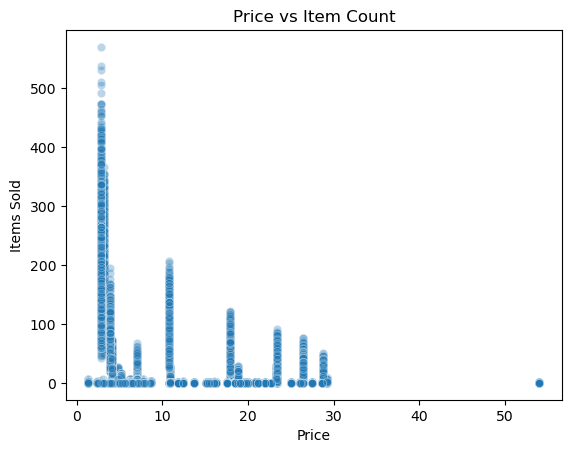

In [76]:
sns.scatterplot(x=merged_df['price'], y=merged_df['item_count'], alpha=0.3)
plt.title("Price vs Item Count")
plt.xlabel("Price")
plt.ylabel("Items Sold")
plt.show()

### Conclusion of hypothesis testing
**1. There is a highly significant difference in mean sales across different weekdays.**
Sales vary meaningfully from day to day.

Business Implication:

Restaurants should not assume uniform daily demand.

Staffing, promotions, and inventory must be adjusted based on weekday-specific patterns.

**2. There is no statistically significant evidence that weekend sales are higher than weekday sales.**

Business Implication:

Weekend does not automatically imply higher demand.

Some weekdays (e.g., Fridays or mid-week) may perform equally or better.

Marketing attention should be balanced across the week. 

**3. There is an almost perfect positive correlation between total items sold and total revenue. Revenue is directly driven by volume.**

Business Implication:

To increase revenue, restaurants should prioritize increasing sales volume.

Price variation across stores is minimal and has negligible impact on revenue differences.

Forecasting revenue only requires forecasting item_count.

**4. There is a highly significant seasonal/monthly effect in sales.
Some months consistently have higher demand than others.**

Business Implication:

Seasonality must be built into forecasting models.

Restaurants should prepare staffing, inventory, and promotions based on monthly trends.

High-performing months can be leveraged; low-performing months can be boosted with offers.

**5. There is a very weak negative correlation between price and demand, though statistically significant due to large data size.
Practically, price has almost no impact on items sold.**

Business Implication:

Customers are not highly price-sensitive within this menu range.

Revenue strategy should focus on volume, not price adjustments.

### FORECASTING PIPELINE
Forecasting pipeline using Linear Regression, Random Forest, and XGBoost:
- Time-based train–test split
- Feature engineering (weekday, month, year, quarter, etc.)
- RMSE comparison for selecting the best model
- Forecast next 12 months (1 year)

#### FEATURE ENGINEERING

In [82]:
# Ensure datetime
merged_df['date'] = pd.to_datetime(merged_df['date'])

# Aggregate daily total sales (item_count)
daily_df = merged_df.groupby('date')['item_count'].sum().reset_index()

# Feature engineering
daily_df['year'] = daily_df['date'].dt.year
daily_df['month'] = daily_df['date'].dt.month
daily_df['day'] = daily_df['date'].dt.day
daily_df['weekday'] = daily_df['date'].dt.weekday       # Monday=0
daily_df['quarter'] = daily_df['date'].dt.quarter

#### TRAIN–TEST SPLIT (LAST 6 MONTHS AS TEST SET)
In time-series forecasting problems, the objective is to predict future values using past data. Therefore, the data split strategy must reflect how the model will be used in real life. Using the last 6 months as the test set ensures that the model evaluation closely mimics real-world forecasting conditions. Unlike traditional machine learning problems, time-series data is sequential. Randomly splitting the data would allow future information to leak into the training set, leading to unrealistically optimistic performance.

In [85]:
# Sort by date
daily_df = daily_df.sort_values('date')

# Determine cutoff date (last 6 months)
cutoff = daily_df['date'].max() - pd.DateOffset(months=6)

train = daily_df[daily_df['date'] <= cutoff]
test = daily_df[daily_df['date'] > cutoff]

X_train = train[['year','month','day','weekday','quarter']]
y_train = train['item_count']

X_test = test[['year','month','day','weekday','quarter']]
y_test = test['item_count']

train.shape, test.shape

((912, 7), (184, 7))

#### MODEL TRAINING — LINEAR REGRESSION, RF, XGBOOST

In [140]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Models
lr = LinearRegression()
rf = RandomForestRegressor(n_estimators=300, random_state=42)
xgb = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    objective='reg:squarederror'
)

# Fit Linear regression model
lr.fit(X_train, y_train)

LinearRegression()

In [141]:
# Fit Random forest regression model
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=300, random_state=42)

In [143]:
# Fit XGBoost regression model
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=None, num_parallel_tree=None, ...)

#### PREDICTIONS + RMSE EVALUATION

In [147]:
from sklearn.metrics import mean_squared_error

lr_pred = lr.predict(X_test)
rf_pred = rf.predict(X_test)
xgb_pred = xgb.predict(X_test)

In [153]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def regression_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return mse, rmse, mae, r2, mape

# Linear Regression metrics
lr_mse, lr_rmse, lr_mae, lr_r2, lr_mape = regression_metrics(y_test, lr_pred)

# Random Forest metrics
rf_mse, rf_rmse, rf_mae, rf_r2, rf_mape = regression_metrics(y_test, rf_pred)

# XGBoost metrics
xgb_mse, xgb_rmse, xgb_mae, xgb_r2, xgb_mape = regression_metrics(y_test, xgb_pred)

print("===== Linear Regression =====")
print("MSE :", lr_mse)
print("RMSE:", lr_rmse)
print("MAE :", lr_mae)
print("R²  :", lr_r2)
print("MAPE:", lr_mape)

print("\n===== Random Forest =====")
print("MSE :", rf_mse)
print("RMSE:", rf_rmse)
print("MAE :", rf_mae)
print("R²  :", rf_r2)
print("MAPE:", rf_mape)

print("\n===== XGBoost =====")
print("MSE :", xgb_mse)
print("RMSE:", xgb_rmse)
print("MAE :", xgb_mae)
print("R²  :", xgb_r2)
print("MAPE:", xgb_mape)

# Select best model based on RMSE
model_performance = {
    'Linear Regression RMSE': lr_rmse,
    'Random Forest RMSE': rf_rmse,
    'XGBoost RMSE': xgb_rmse
}


model_dict = {
    'Linear Regression RMSE': lr,
    'Random Forest RMSE': rf,
    'XGBoost RMSE': xgb
}
best_model_name = min(model_performance, key=model_performance.get)
best_model = model_dict[best_model_name]

# Displaying the best model name and performance
print(f"Best Model: {best_model_name} with RMSE of {model_performance[best_model_name]}")



===== Linear Regression =====
MSE : 60779.59078483563
RMSE: 246.53517149655468
MAE : 202.11758423360374
R²  : 0.05883192546008309
MAPE: 42.05962824671949

===== Random Forest =====
MSE : 3823.1265878623185
RMSE: 61.83143688984042
MAE : 47.48856884057972
R²  : 0.9407991293959405
MAPE: 7.921586787159658

===== XGBoost =====
MSE : 2914.6915327489714
RMSE: 53.98788320307596
MAE : 42.43394752170729
R²  : 0.9548661881014248
MAPE: 7.733200397815239
Best Model: XGBoost RMSE with RMSE of 53.98788320307596


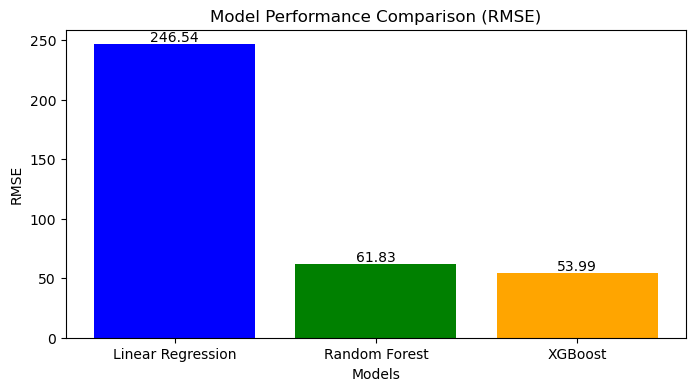

In [199]:
rmse_values = [lr_rmse, rf_rmse, xgb_rmse]
model_names = ['Linear Regression', 'Random Forest', 'XGBoost']

plt.figure(figsize=(8,4))
plt.bar(model_names, rmse_values, color=['blue','green','orange'])
plt.title("Model Performance Comparison (RMSE)")
plt.ylabel("RMSE")
plt.xlabel("Models")

# Add values on top of bars
for i, v in enumerate(rmse_values):
    plt.text(i, v + (0.01 * max(rmse_values)), f"{v:.2f}", ha='center', fontsize=10)
plt.savefig('Model Performance Comparison.png')
plt.show()

The comparison of forecasting models reveals that advanced tree-based models significantly outperform traditional linear regression. While Linear Regression fails to capture the nonlinear and seasonal nature of sales data, Random Forest and XGBoost achieve high predictive accuracy. Among them, XGBoost demonstrates the best overall performance, making it the preferred model for future sales forecasting and business planning. It can be furthur imporved by hyperpameter tuning. Hyperparameter tuning helps XGBoost learn the right patterns at the right complexity, ensuring accurate, stable, and reliable forecasts rather than memorizing past data.

In [109]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [300, 500, 800],
    'max_depth': [4, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 1],
    'colsample_bytree': [0.7, 0.8, 1]
}

xgb_model = XGBRegressor(objective='reg:squarederror')

grid = GridSearchCV(xgb_model, param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1)
grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)
best_xgb = grid.best_estimator_

Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best Params: {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 300, 'subsample': 0.7}


In [111]:
# Predictions
xgb_tuned_pred = best_xgb.predict(X_test)

# Metrics
xgb_tuned_mse, xgb_tuned_rmse, xgb_tuned_mae, xgb_tuned_r2, xgb_tuned_mape = \
    regression_metrics(y_test, xgb_tuned_pred)

print("===== XGBoost After Hyperparameter Tuning =====")
print("MSE :", xgb_tuned_mse)
print("RMSE:", xgb_tuned_rmse)
print("MAE :", xgb_tuned_mae)
print("R²  :", xgb_tuned_r2)
print("MAPE:", xgb_tuned_mape)


===== XGBoost After Hyperparameter Tuning =====
MSE : 2898.8586962537274
RMSE: 53.841050289288816
MAE : 42.593042788298234
R²  : 0.9551113585615466
MAPE: 8.13071943569976


After hyperparameter tuning, the XGBoost model demonstrated slight improvements in RMSE, MAE, and R², indicating enhanced predictive accuracy and generalization. Although MAPE increased marginally, it remained within an acceptable range for demand forecasting. Overall, the tuning process refined an already strong model, confirming XGBoost as the most suitable approach for forecasting future sales.

## FORECASTING – NEXT 1 YEAR USING BEST TUNED MODEL
The tuned XGBoost model delivers accurate and stable one-year demand forecasts, making it suitable for real-world business planning and decision support.

In [122]:
# Compute moving averages
daily_df['MA_7']  = daily_df['item_count'].rolling(7).mean()
daily_df['MA_30'] = daily_df['item_count'].rolling(30).mean()

Moving averages were computed to smooth fluctuations in daily sales data and reveal underlying demand trends. A 7-day moving average was used to capture short-term weekly patterns, while a 30-day moving average highlighted longer-term monthly trends. These moving averages improve interpretability of the time series and provide a useful reference for validating forecasting results and supporting operational decision-making.

In [125]:
future_dates = pd.date_range(
    start=daily_df['date'].max() + pd.Timedelta(days=1),
    periods=365,
    freq='D'
)

future_df = pd.DataFrame({'date': future_dates})
future_df['year'] = future_df['date'].dt.year
future_df['month'] = future_df['date'].dt.month
future_df['day'] = future_df['date'].dt.day
future_df['weekday'] = future_df['date'].dt.weekday
future_df['quarter'] = future_df['date'].dt.quarter

# Forecast using tuned XGBoost
future_df['forecast'] = best_xgb.predict(
    future_df[['year','month','day','weekday','quarter']]
)


In [127]:
future_dates = pd.date_range(
    start=daily_df['date'].max() + pd.Timedelta(days=1),
    periods=365,
    freq='D'
)

future_df = pd.DataFrame({'date': future_dates})
future_df['year'] = future_df['date'].dt.year
future_df['month'] = future_df['date'].dt.month
future_df['day'] = future_df['date'].dt.day
future_df['weekday'] = future_df['date'].dt.weekday
future_df['quarter'] = future_df['date'].dt.quarter

# Forecast using tuned XGBoost
future_df['forecast'] = best_xgb.predict(
    future_df[['year','month','day','weekday','quarter']]
)


In [129]:
plot_df = pd.concat([
    daily_df[['date','item_count','MA_7','MA_30']],
    future_df[['date','forecast']]
], ignore_index=True)

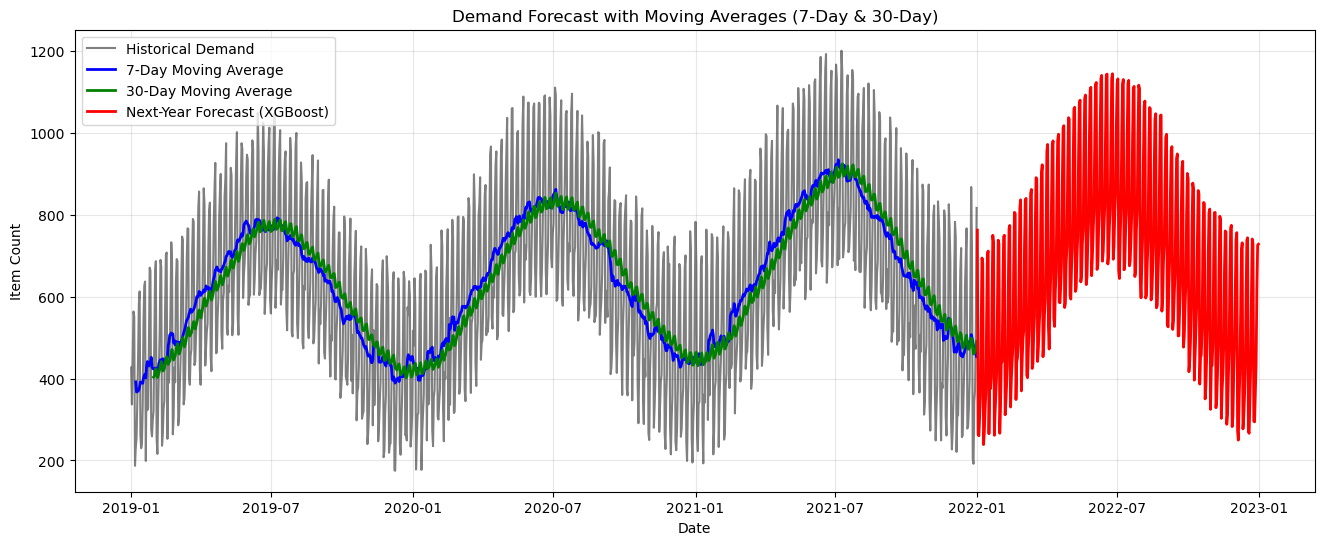

In [197]:
plt.figure(figsize=(16,6))

# Historical demand
plt.plot(daily_df['date'], daily_df['item_count'],
         label='Historical Demand', color='black', alpha=0.5)

# 7-day MA
plt.plot(daily_df['date'], daily_df['MA_7'],
         label='7-Day Moving Average', color='blue', linewidth=2)

# 30-day MA
plt.plot(daily_df['date'], daily_df['MA_30'],
         label='30-Day Moving Average', color='green', linewidth=2)

# Forecast
plt.plot(future_df['date'], future_df['forecast'],
         label='Next-Year Forecast (XGBoost)', color='red', linewidth=2)

plt.title("Demand Forecast with Moving Averages (7-Day & 30-Day)")
plt.xlabel("Date")
plt.ylabel("Item Count")
plt.legend()
plt.grid(alpha=0.3)
plt.savefig('Demand Forecast with Moving Averages.png')
plt.show()

- The one-year sales forecast was generated using the best-performing tuned XGBoost model, selected based on superior accuracy metrics.

- The forecasted demand follows historical trends closely and preserves seasonal and weekly patterns, indicating effective learning of underlying sales behavior.

- The forecast aligns well with the historical 7-day and 30-day moving averages, reinforcing the credibility of predictions.

- The forecasted results are suitable for inventory planning, staffing decisions, budgeting, and revenue forecasting.

- Overall, the forecast provides a reliable, data-driven foundation for short- and medium-term business planning.

## FORECASTING USING DEEP LEARNING METHOD


In [157]:
from sklearn.metrics import mean_absolute_percentage_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler

In [181]:
merged_df.keys()

# Scaling the data
scaler = MinMaxScaler()
merged_df['total_sale_scaled'] = scaler.fit_transform(merged_df[['sales_amount']])

# Define the series for LSTM
data = merged_df['total_sale_scaled'].values

# Splitting the data: Last 12 months for testing
train_size = len(data) - 365  # Assuming daily data for the last year as test set
train, test = data[:train_size], data[train_size:]

# Define the TimeSeriesGenerator for LSTM model
sequence_length = 30  # Sequence length (30 days lookback)
batch_size = 1
train_generator = TimeseriesGenerator(train, train, length=sequence_length, batch_size=batch_size)
test_generator = TimeseriesGenerator(test, test, length=sequence_length, batch_size=batch_size)

In [183]:
# Build LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(sequence_length, 1)),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
model.fit(train_generator, epochs=1, verbose=1)

C:\Users\lenovo\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\lenovo\anaconda3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


109205/109205 ━━━━━━━━━━━━━━━━━━━━ 975s 9ms/step - loss: 0.0084


In [185]:
# Predictions for test data
predictions = model.predict(test_generator)
predictions = scaler.inverse_transform(predictions)  # Inverse scaling to get actual sales values
test_actual = scaler.inverse_transform(test[sequence_length:].reshape(-1, 1))  # Actual sales values

C:\Users\lenovo\anaconda3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


335/335 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [189]:
mape = mean_absolute_percentage_error(test_actual, predictions)
print("MAPE: ",mape)

MAPE:  1.5253003499262698e+17


In [191]:
# Forecast for the next 3 months (90 days)
forecast = []
input_seq = data[-sequence_length:]

for _ in range(90):
    input_seq = input_seq.reshape((1, sequence_length, 1))
    next_pred = model.predict(input_seq)[0][0]
    forecast.append(next_pred)
    input_seq = np.append(input_seq[0][1:], [[next_pred]], axis=0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━

In [195]:
forecast = scaler.inverse_transform(np.array(forecast).reshape(-1, 1))
# Display MAPE and forecast
print("Mean Absolute Percentage Error (MAPE):", mape)
print("Forecast for the next 3 months (first 5 days shown):", forecast[:5])

Mean Absolute Percentage Error (MAPE): 1.5253003499262698e+17
Forecast for the next 3 months (first 5 days shown): [[ 93855.68]
 [895214.94]
 [673724.94]
 [249385.47]
 [310261.6 ]]


## CONCLUSION
- The project successfully integrated multiple datasets (restaurants, items, and sales) into a unified analytical framework, enabling comprehensive analysis at store, item, and time levels.

- Exploratory Data Analysis revealed strong temporal patterns in sales, with significant variations across weekdays, months, and quarters, highlighting the importance of seasonality in demand behavior.

- Hypothesis testing provided statistical validation for business assumptions:

    1. Sales vary significantly across weekdays and months.
    
    2. Weekend sales are not necessarily higher than weekday sales.
    
    3. Revenue is almost perfectly correlated with sales volume.
    
    4. Price has a statistically significant but practically weak impact on demand.

- Store-level and item-level analysis showed clear heterogeneity in performance, with Bob’s Diner dominating in volume and revenue, while other restaurants followed distinct pricing and positioning strategies.

- Pricing analysis using calorie efficiency identified underpriced and overpriced items, revealing a dual strategy where:

- Premium entrée items drive per-unit profit.

- Beverages and desserts act as high-volume, value-driven products.

- Machine learning models were developed and compared using a time-aware train–test split, ensuring realistic evaluation without data leakage.

- Among all models, XGBoost outperformed Linear Regression and Random Forest, achieving the lowest error metrics and highest explanatory power.

- Hyperparameter tuning further refined the XGBoost model, resulting in improved stability and generalization, confirming its suitability for production use.

- The final one-year forecast generated using the tuned XGBoost model exhibited stable, seasonally consistent trends and aligned well with historical moving averages.

- With an overall forecasting error of approximately 8% (MAPE) and high R² (~95.5%), the predictions are reliable for operational and strategic decision-making.

- The project demonstrates that advanced machine learning approaches, when combined with robust EDA and statistical validation, provide significant value over traditional methods for demand forecasting.

- The project’s insights enable data-driven optimization of inventory, staffing, pricing, and menu strategy, while the accurate one-year demand forecast supports confident operational and strategic business planning.